# **Project name = MALL CUSTOMERS SEGMENTATION**

# **Why are we doing it ?**

# **Customers who come for shopping in mall can be grouped in number of ways. like shopping pattern,spending pattern,shopping score, salary ETC.**

# **How it will help ?**

# **The reason for these clusters is to help the identify those customers who would be interested in certain products, offers & services.**

# **This help in terms of revenue & more customers through customer recommendation.**

# **Buisness Objective : To create customer cluster to identify the different types of clusters**



In [ ]:
from google.colab import drive                     # to connect the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#first we have to import all relevant python packages 

import numpy as np               
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
MallCust_data = pd.read_csv('/content/drive/MyDrive/MINI PROJECT/DS3_C6_S3_MallCustomers_Data_Project.csv')
MallCust_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
MallCust_data.isnull().sum()         #checking for null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
MallCust_data.dtypes                      # checking the data types of column

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
MallCust_data = MallCust_data.replace(to_replace = "@_!#$%^&*()<>?/\|}{~:?", value = np.nan)        ## check special character in dataset 

In [ ]:
MallCust_data.isnull().sum()         #checking for null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
MallCust_data.describe()       # to get Summary of dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
MallCust_data_1 = MallCust_data.copy()                    # making copy of data

In [ ]:
# Gender are irrelevant field and can be dropped

new_MallCust_data = MallCust_data_1. drop(labels='Gender', axis=1)   # Dropping the gender column 
new_MallCust_data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


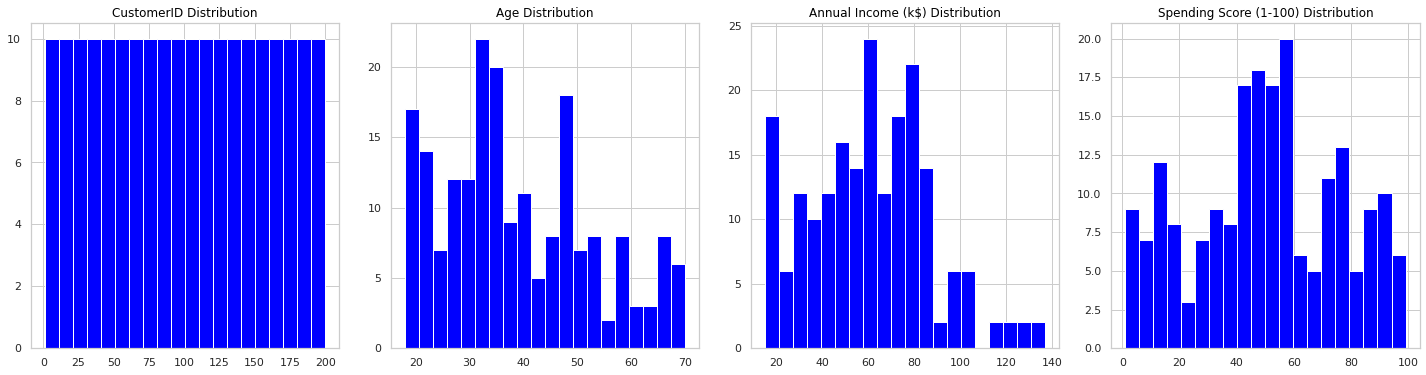

In [ ]:
import matplotlib.pyplot as plt                                       # for visualization

#histogram for numerical columns

fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(new_MallCust_data.columns):
    ax=fig.add_subplot(4,4,i+1)
    new_MallCust_data[feature].hist(bins=20,ax=ax,facecolor='blue')
    ax.set_title(feature+" Distribution",color='Black')

fig.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
# Here we use a column with categorical data
fig = px.histogram(MallCust_data, x="Gender")
fig.show()

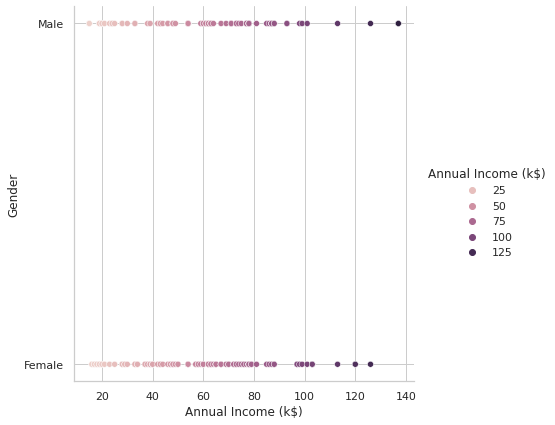

In [ ]:
import seaborn as sns
sns.pairplot(MallCust_data,x_vars='Annual Income (k$)', y_vars='Gender',height=6, hue ='Annual Income (k$)')

In [ ]:
df = px.data.tips()
fig = px.histogram(MallCust_data, x="Annual Income (k$)", nbins=10)
fig.show()

# **Data Scaling**

# **There is no huge difference in the scales of Age, Annual Income and Spending Score features, so ne need to scale this dataset.**

# **USING K - MEANS CLUSTERING**

# **Finding the optimum value of K using Elbow Method**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
%matplotlib inline
import warnings

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# CustomerID and Genre are irrelevant fields and can be dropped. Creating a matrix of independent variables by select only Ageand Annual Income.

In [ ]:
X = new_MallCust_data.iloc[:, [2,3]].values

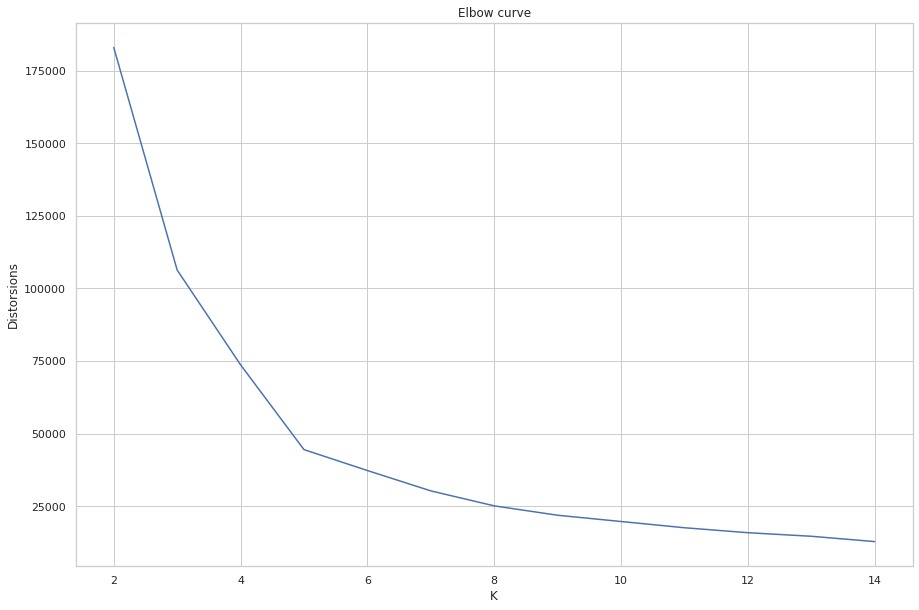

In [ ]:
distorsions = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 10))
plt.plot(range(2, 15), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

# **Finding the optimum value of K and cluster efficiency using Silhouette Score**

For n_clusters = 2 The average silhouette_score is : 0.47934627465976204
For n_clusters = 3 The average silhouette_score is : 0.37674423270868146
For n_clusters = 4 The average silhouette_score is : 0.42253938419029213
For n_clusters = 5 The average silhouette_score is : 0.4337735737304998
For n_clusters = 6 The average silhouette_score is : 0.40975166193702944
For n_clusters = 7 The average silhouette_score is : 0.4076566238373471
For n_clusters = 8 The average silhouette_score is : 0.4056663691364117
For n_clusters = 9 The average silhouette_score is : 0.40097178276050216
For n_clusters = 10 The average silhouette_score is : 0.39263582296353094
For n_clusters = 11 The average silhouette_score is : 0.38452506620790783
For n_clusters = 12 The average silhouette_score is : 0.3631483205413773
For n_clusters = 13 The average silhouette_score is : 0.3630125541821688
For n_clusters = 14 The average silhouette_score is : 0.3347410205378493


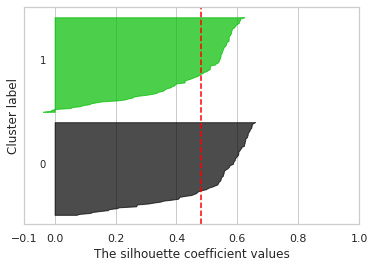

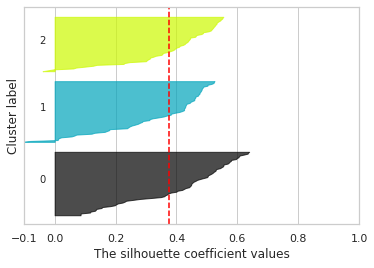

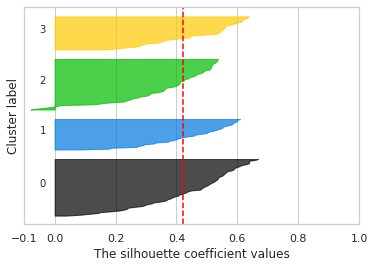

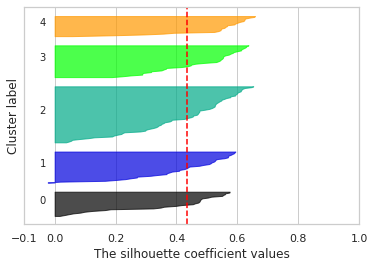

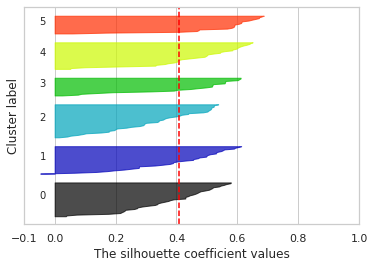

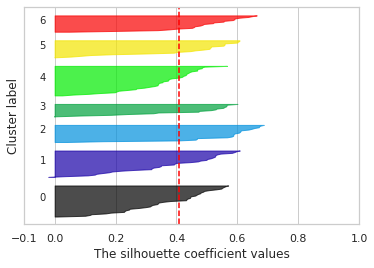

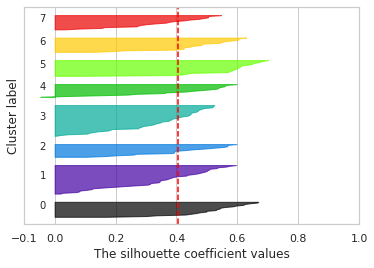

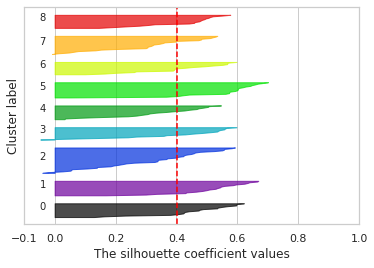

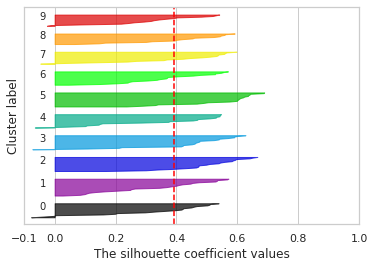

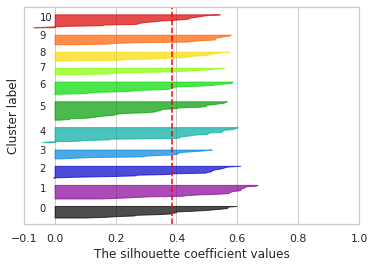

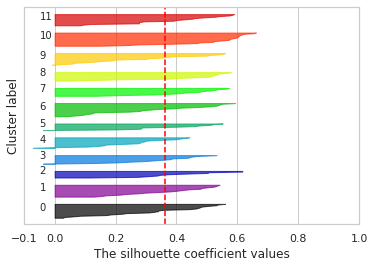

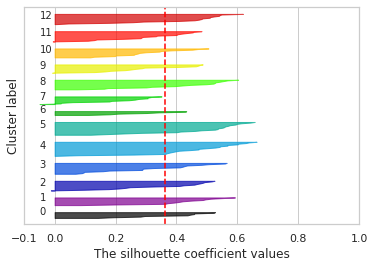

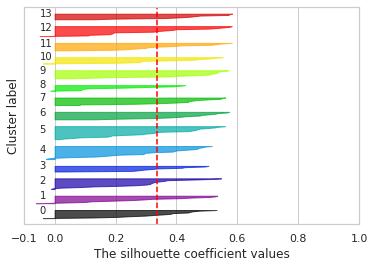

In [ ]:
range_n_clusters = np.arange(start=2, stop=15, step=1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(new_MallCust_data) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=40)
    cluster_labels = clusterer.fit_predict(new_MallCust_data)

    silhouette_avg = silhouette_score(new_MallCust_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(new_MallCust_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [ ]:
Kmeans_model_5 = KMeans(n_clusters = 5)
Kmeans_model_5.fit(new_MallCust_data)

KMeans(n_clusters=5)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
cluster_centroid_5 = Kmeans_model_5.cluster_centers_
cluster_centroid_5

array([[162.        ,  32.69230769,  86.53846154,  82.12820513],
       [ 92.53030303,  42.72727273,  57.75757576,  49.46969697],
       [ 33.86111111,  44.97222222,  32.08333333,  31.13888889],
       [164.        ,  40.80555556,  87.91666667,  17.88888889],
       [ 24.        ,  25.52173913,  26.30434783,  78.56521739]])

In [ ]:
labels = Kmeans_model_5.labels_
labels

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

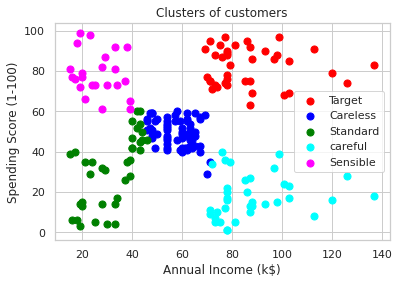

In [ ]:

plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 50, c = 'red', label = 'Target')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 50, c = 'blue', label = 'Careless')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 50, c = 'green', label = 'Standard')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 50, c = 'cyan', label = 'careful')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# **Using  Hierarchical Clustering**

# **Plotting Dendogram**

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

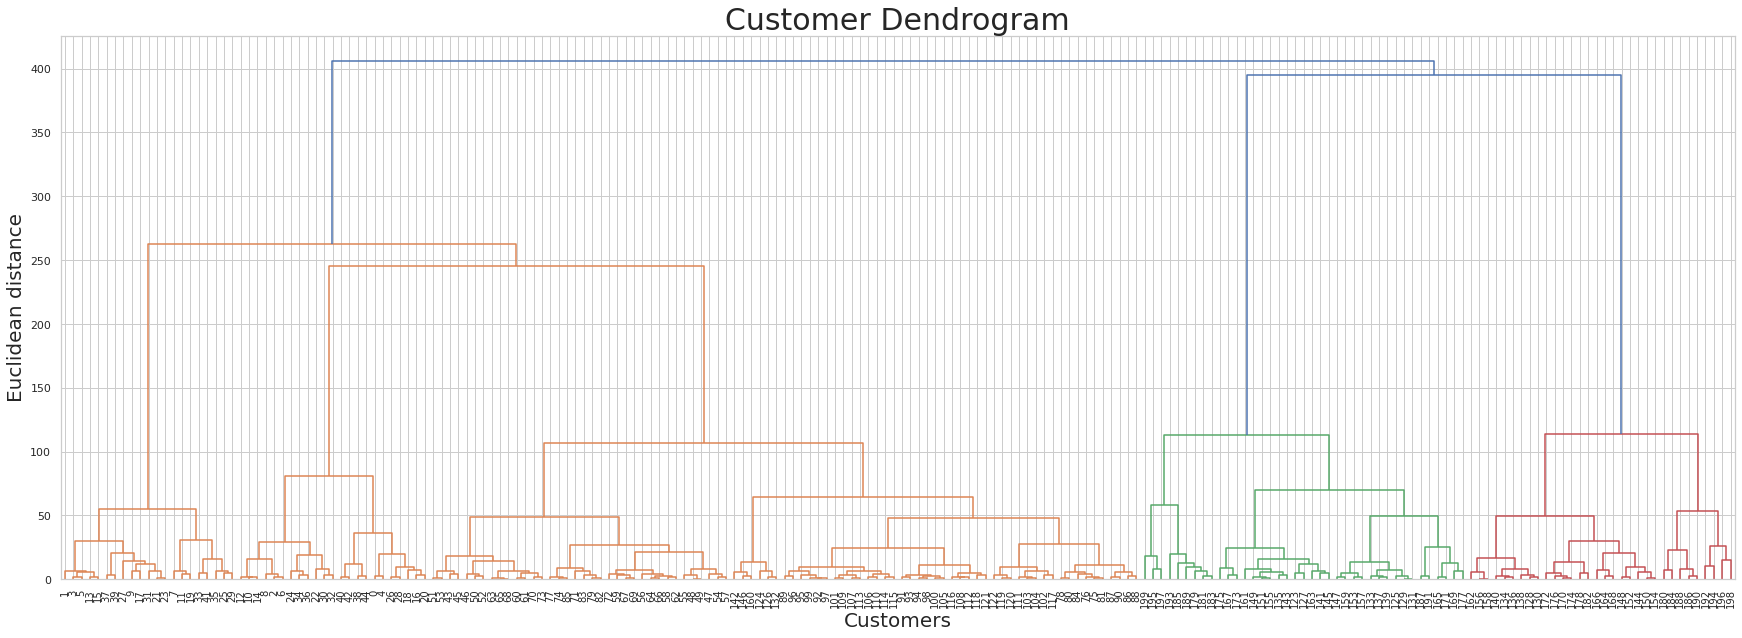

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=new_MallCust_data.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

# The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with the maximum distance is the blue line and hence we can decide a threshold of 200 and cut the dendrogram:

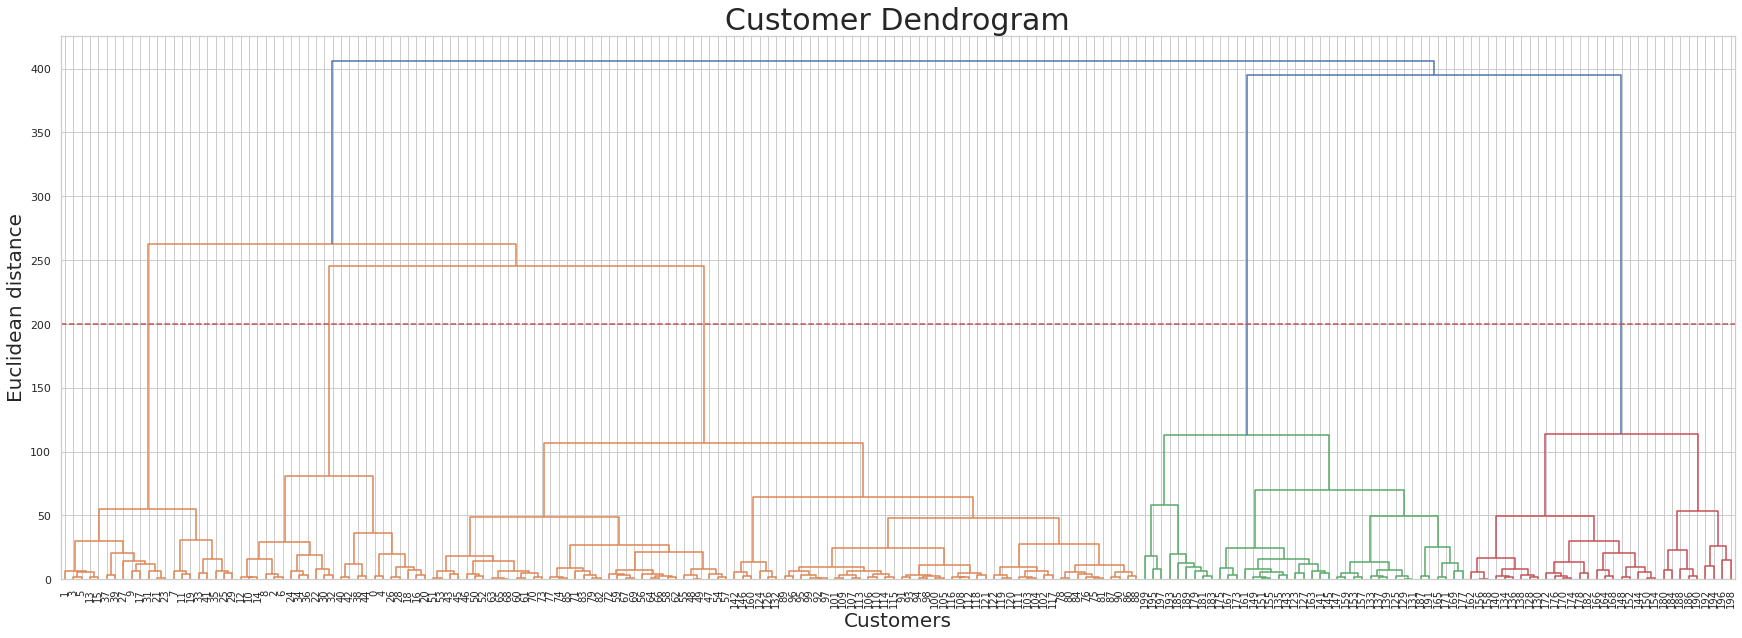

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=new_MallCust_data.index)
plt.axhline(y=200, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

# **Model Building**

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

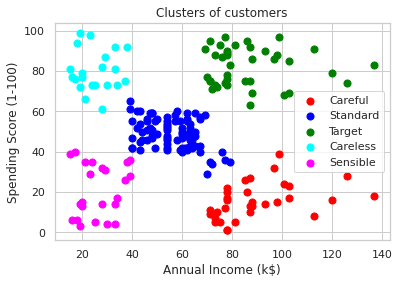

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# A cluster of customers based on their annual income and spending score.

# **Using DBSCAN CLUSTERING**

In [ ]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# **Find the optimum values of hyperparameters of DBSCAN algorithm**

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

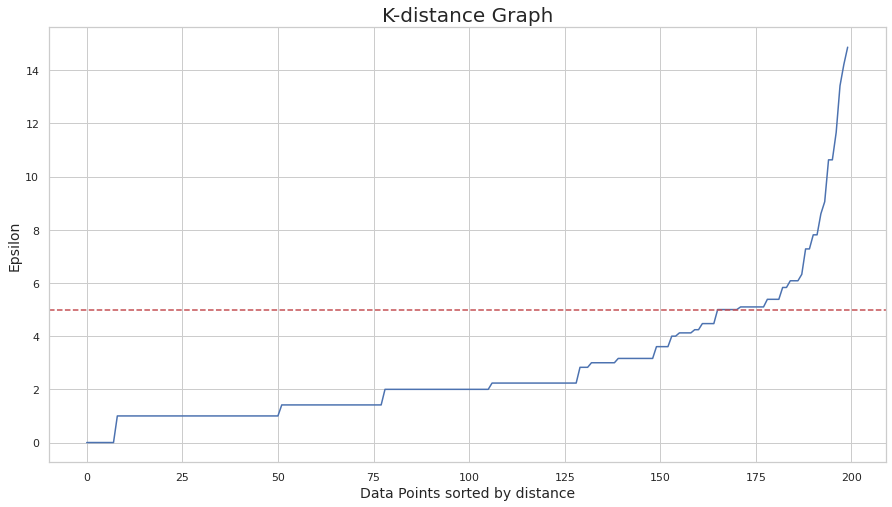

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=5, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
eps=5
for min_samples in [2,3,4,5,6,7,8,9]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 5 | min_samples=  2 | obtained clustering:  [(1, 29), (2, 2), (3, 6), (4, 3), (5, 3), (6, 2), (7, 4), (8, 5), (9, 3), (10, 2), (11, 2), (12, 2), (13, 2), (14, 79), (15, 11), (16, 10), (17, 2), (18, 14), (19, 3), (20, 2), (21, 2), (22, 2), (23, 4), (24, 2), (25, 2), (26, 2)]
eps= 5 | min_samples=  3 | obtained clustering:  [(1, 55), (2, 3), (3, 6), (4, 3), (5, 4), (6, 5), (7, 3), (8, 79), (9, 11), (10, 10), (11, 14), (12, 3), (13, 4)]
eps= 5 | min_samples=  4 | obtained clustering:  [(1, 76), (2, 6), (3, 79), (4, 10), (5, 10), (6, 11), (7, 4), (8, 4)]
eps= 5 | min_samples=  5 | obtained clustering:  [(1, 87), (2, 6), (3, 78), (4, 10), (5, 9), (6, 10)]
eps= 5 | min_samples=  6 | obtained clustering:  [(1, 100), (2, 76), (3, 10), (4, 6), (5, 8)]
eps= 5 | min_samples=  7 | obtained clustering:  [(1, 116), (2, 76), (3, 8)]
eps= 5 | min_samples=  8 | obtained clustering:  [(1, 120), (2, 72), (3, 8)]
eps= 5 | min_samples=  9 | obtained clustering:  [(1, 129), (2, 71)]


In [ ]:
x = MallCust_data.iloc[:,3:]

In [ ]:
dbscan_opt = DBSCAN(eps=5, min_samples=5)
dbscan_opt.fit(x)

DBSCAN(eps=5)

In [ ]:
x['DBSCAN_opt_labels']=dbscan_opt.labels_
x['DBSCAN_opt_labels'].value_counts()

-1    87
 1    78
 2    10
 4    10
 3     9
 0     6
Name: DBSCAN_opt_labels, dtype: int64

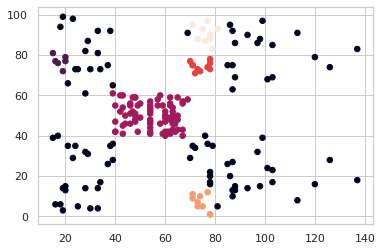

In [ ]:
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=x['DBSCAN_opt_labels'],s=30)

# **Cluster formation with Hierarchical Clustering is better than other clustering methods.where no of cluster value is = 5**